# 11월 15일

# 공공기온데이터를 활용해서 데이터 분석 해보기
오늘의 목표: 백년치 기온 중 최고 기온이 있던 날을 구해보자

In [ ]:
import csv

f = open("./00.data/incheon.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
print(data)
f.close()


## 인천

In [ ]:
import csv

f = open("./00.data/incheon.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')

for row in data:
    print(row)
    
f.close()

# 자료 특징 -> 리스트로 들어간다, 리스트 안에 있는 데이터들이 모두 문자 ''로 처리되었다.

#### 결측치 처리

In [ ]:
import csv

f = open("./00.data/incheon.csv","r",encoding="cp949")
data = csv.reader(f,delimiter=",")

header = next(data)
maxtemp = []

for row in data:
    num = row[4]
    if num == "":
        row[4] = -999  # 결측치를 -999로 세팅한 이유 : 지금 목표가 최고 온도를 구하는 건데 -999는 절대 최고 온도로 나올 수 없는 값이기 때문에
    else:
        row[4] = float(row[4])
    print(row)
    
f.close()

#### 최종 기온 찾기

In [ ]:
import csv
max_temp = -999
max_date = ''

f = open("./00.data/incheon.csv","r",encoding="cp949")
data = csv.reader(f,delimiter=",")

header = next(data)

for row in data:
    num = row[4]
    if num == "":
        row[4] = -999  # 결측치를 -999로 세팅한 이유 : 지금 목표가 최고 온도를 구하는 건데 -999는 절대 최고 온도로 나올 수 없는 값이기 때문에
    else:
        row[4] = float(row[4])
    
    if max_temp >= row[4]:
        max_temp = max_temp
    else:
        max_temp = row[4]
        max_date = row[0].strip()  #현재 날짜 데이터가 공백을 갖고 있어서 스트립 함수로 잘라줌
        print(max_temp,max_date)
        
print('최고 기온 : ',max_temp,'\n','기록일: ',max_date)
    
f.close()

## 데이터 시각화


### .plot () : 기본 꺾은선 그래프

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.stem(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

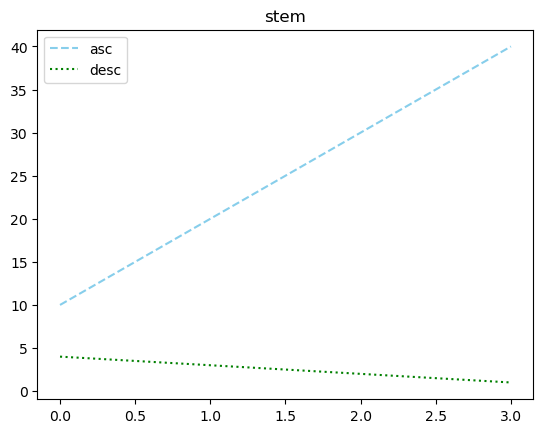

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('stem')
plt.plot([10,20,30,40],label='asc',color='skyblue',linestyle = '--')  #label = 그래프 이름(범례) 지정, color = 그래프 색상 지정
plt.plot([4,3,2,1],label='desc',color='green',ls = ':')  
plt.legend(loc=5)  #loc = 5 는 범례 위치를 지정한다
plt.legend(loc=2)  #loc = 2 는 범례 위치를 지정한다
plt.show()


# .title: 그래프 제목 표시
# .plot: 그래프 그리기    가지는 속성들: label= / color= / linestyle(ls로 쓸 수 있음)=
# .legend(): 그래프 범례 표시  가지는 속성들: loc = n
# .show: 그래프 출력

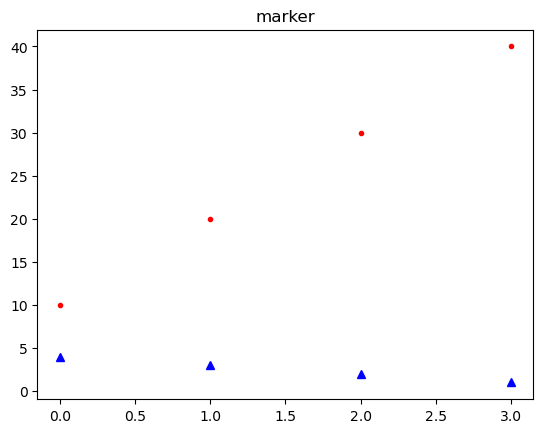

In [1]:
import matplotlib.pyplot as plt
# plt.table('marker')
plt.title('marker')
plt.plot([10,20,30,40],'r.',label='circle')
plt.plot([4,3,2,1],'b^',label='green triangle')
plt.show()

#### 리스트를 그래프로 뽑기

In [ ]:
import csv

f = open("./00.data/incheon.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
result = []

next(data)
# print(header)
for row in data:
    # print(row[4])
    # num = row[4]
    # if num == "":
    #     row[4] = -999
    # else:
    #     row[4] = float(row[4])
        
    if row[4] != "":
        result.append(float(row[4]))
print(result)
f.close()


In [ ]:
print(len(result)/365)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('incheon')
plt.figure(figsize = (10,2),dpi=100)
plt.plot(result,'r') 

plt.show()

#### 8월 데이터만 뽑아보기

##### 잠시 복습

In [ ]:
s ='hello python'
s = s.split(" ")
print(len(s))
print(s)

In [ ]:
date = '1907-10-01'
date = date.split("-")
print(len(date))
print(date)


##### 8월 뽑기

In [ ]:
# 나의 결측치 처리 방법 -> try - except로 치워버리기

import csv

f = open("./00.data/incheon.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
aug_data = []

next(data)
for row in data:
    try:
        dates = row[0].split("-")
        
        if dates[1] == '08':
            row[4] = float(row[4])
            aug_data.append(row[4])
        else:    
            pass
    except Exception:
        pass
    
print(aug_data)
f.close()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (10,2),dpi=100)
plt.plot(aug_data,'r') 

plt.show()

In [ ]:
# 결측치 처리 교수님 버전 -> if절로 치워버리기

import csv

f = open("./00.data/incheon.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
aug_dates = []

next(data)
for row in data:
    if row[4] != "":
        dates = row[0].split("-")
        if dates[1] == '08':
            aug_dates.append(float(row[4]))
        else:
            pass
print(aug_dates)
f.close()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (10,2),dpi=100)
plt.plot(aug_dates,'r') 

plt.show()

#### 내 생일의 백년치 온도

In [ ]:
import csv

f = open("./00.data/incheon.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
birth_data = []

next(data)
for row in data:
    if row[4] != "":
        dates = row[0].split("-")
        if dates[1] == '02' and dates[2] == '17':
            birth_data.append(float(row[4]))
            # print(row)  #내 생일만 뽑힌거 맞는지 확인
        else:
            pass
print(birth_data)
f.close()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (10,2),dpi=100)
plt.plot(birth_data,'r') 

plt.show()

In [ ]:
import csv

f = open("./00.data/incheon.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
birth_data = []
temp_high = []
temp_low = []

next(data)
for row in data:
    if row[4] != "":
        dates = row[0].split("-")
        if dates[1] == '02' and dates[2] == '17':
            # birth_data.append(float(row[4]))
            temp_high.append(float(row[4]))
            temp_low.append(float(row[3]))
            # print(row)  #내 생일만 뽑힌거 맞는지 확인
        else:
            pass
# print(birth_data)
print(temp_high)
print(temp_low)
f.close()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (10,2),dpi=100)
plt.plot(temp_high,'r',label='highest')
plt.plot(temp_low,'r',label='lowest',color='blue') 
plt.legend(loc=2)
plt.title('birthday temps for 100 years')
plt.show()

### .hist() : 히스토그램 Histogram

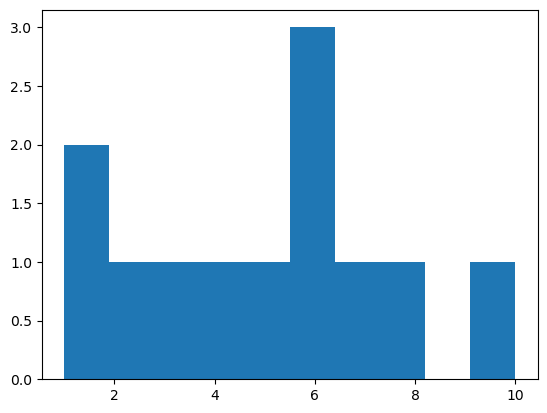

In [5]:
import matplotlib.pyplot as plt
plt.hist([1,1,2,3,4,5,6,6,6,7,8,10])
plt.show()

[5, 1, 4, 2, 2]


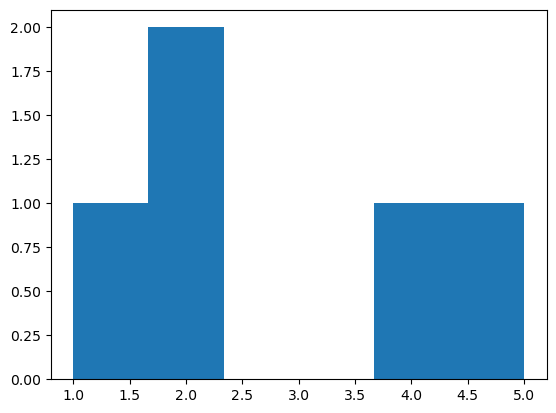

In [6]:
import random

dice = []
for i in range(5):
    dice.append(random.randint(1,6))
    
print(dice)

plt.hist(dice, bins=6)
plt.show()

[1, 6, 5, 1, 1, 5, 2, 6, 6, 5, 4, 6, 1, 4, 4, 1, 5, 3, 4, 1, 6, 3, 1, 4, 1, 3, 5, 5, 4, 2, 4, 5, 3, 5, 1, 1, 6, 5, 3, 4, 6, 3, 5, 5, 2, 5, 3, 1, 3, 6, 2, 6, 2, 6, 5, 3, 4, 3, 5, 5, 3, 2, 3, 2, 3, 5, 4, 6, 3, 2, 2, 6, 6, 1, 2, 1, 2, 1, 1, 6, 3, 6, 2, 4, 3, 3, 1, 5, 1, 3, 6, 5, 1, 4, 6, 2, 4, 2, 6, 1, 2, 5, 1, 3, 6, 2, 3, 1, 4, 6, 5, 1, 2, 5, 4, 6, 1, 5, 1, 5, 3, 3, 3, 3, 2, 6, 6, 3, 2, 2, 2, 4, 5, 1, 1, 1, 4, 3, 2, 4, 1, 4, 3, 3, 4, 5, 2, 5, 1, 5, 2, 6, 5, 1, 3, 2, 2, 1, 2, 2, 2, 2, 4, 1, 2, 4, 3, 5, 2, 5, 3, 3, 6, 4, 5, 6, 5, 1, 2, 1, 3, 2, 2, 3, 5, 6, 6, 1, 1, 1, 4, 1, 4, 1, 3, 5, 1, 3, 2, 2, 6, 5, 6, 4, 1, 6, 2, 5, 1, 1, 4, 4, 4, 3, 3, 1, 1, 2, 1, 6, 5, 1, 2, 5, 6, 6, 6, 6, 2, 2, 1, 1, 5, 3, 4, 3, 4, 3, 2, 5, 3, 4, 4, 2, 3, 2, 6, 4, 2, 5, 2, 3, 3, 1, 4, 3, 4, 1, 5, 2, 2, 6, 5, 2, 1, 2, 6, 2, 6, 6, 6, 3, 1, 5, 1, 4, 2, 2, 5, 1, 5, 4, 6, 6, 6, 1, 4, 4, 2, 1, 1, 6, 3, 5, 3, 3, 4, 5, 3, 4, 4, 4, 4, 1, 1, 5, 4, 5, 1, 4, 5, 2, 6, 6, 3, 3, 6, 3, 4, 6, 1, 5, 1, 5, 2, 3, 2, 4, 6, 6, 6, 4, 2, 

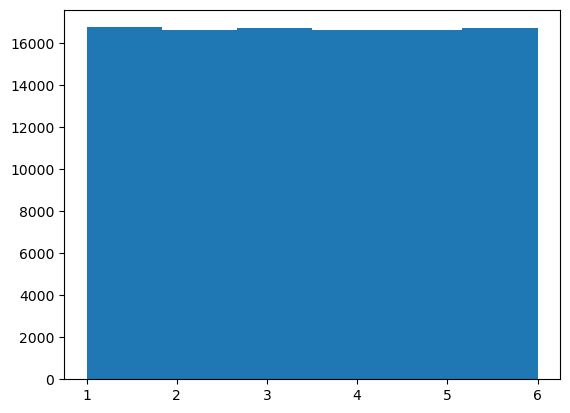

In [7]:
import random

dice = []
for i in range(100000):
    dice.append(random.randint(1,6))
    
print(dice)

plt.hist(dice, bins=6)
plt.show()

In [8]:
import csv
max_temp = -999
max_date = ''

f = open("./00.data/incheon.csv","r",encoding="cp949")
data = csv.reader(f,delimiter=",")

next(data)
hist_result=[]

for row in data:
    if row[4] != "":
        hist_result.append(float(row[4]))
    
f.close()



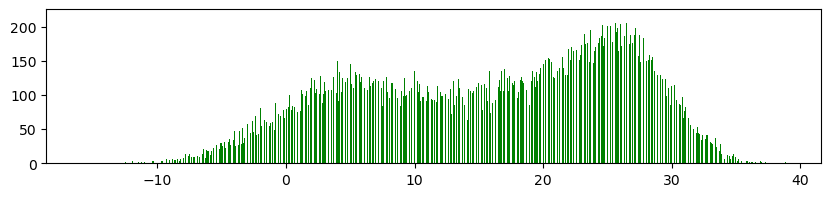

In [9]:
plt.figure(figsize = (10,2), dpi = 100)
plt.hist(hist_result, bins=1000,color='g')
plt.show()

In [10]:

import csv

f = open("./00.data/incheon.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
aug_data = []

next(data)
for row in data:
    try:
        dates = row[0].split("-")
        
        if dates[1] == '08':
            aug_data.append(float(row[4]))
        else:    
            pass
    except Exception:
        pass
    
print(aug_data)
f.close()


[30.4, 31.5, 31.3, 31.3, 33.3, 32.1, 31.3, 29.1, 27.5, 26.0, 30.6, 30.1, 30.4, 30.8, 32.1, 31.7, 29.8, 26.0, 26.8, 27.8, 27.9, 28.0, 29.4, 31.6, 30.1, 31.1, 31.8, 31.6, 29.4, 29.1, 29.9, 24.3, 25.4, 25.9, 28.5, 24.7, 25.8, 25.8, 28.3, 29.0, 27.2, 24.8, 22.8, 26.2, 28.3, 29.0, 29.2, 26.7, 26.6, 21.8, 25.0, 23.8, 25.2, 25.3, 25.7, 23.4, 27.7, 28.1, 25.0, 23.5, 28.3, 28.9, 28.1, 32.8, 28.1, 27.6, 29.1, 24.0, 26.9, 25.5, 28.8, 28.5, 28.0, 28.4, 25.0, 28.6, 26.3, 25.7, 26.6, 25.7, 24.8, 27.1, 27.6, 25.4, 25.1, 27.3, 26.6, 27.8, 25.7, 29.1, 30.0, 27.5, 24.7, 26.5, 32.6, 31.3, 32.2, 34.6, 29.9, 29.4, 27.1, 26.5, 29.4, 29.6, 30.2, 31.5, 30.4, 30.1, 29.4, 28.1, 28.4, 27.8, 25.6, 27.3, 26.5, 30.1, 30.6, 30.3, 28.9, 31.3, 28.8, 26.1, 26.6, 26.3, 28.9, 28.9, 29.2, 28.4, 29.3, 31.0, 31.2, 28.3, 25.3, 24.9, 30.0, 28.4, 27.7, 27.5, 29.6, 29.8, 30.0, 31.5, 29.8, 30.2, 28.5, 25.0, 26.1, 26.6, 23.1, 19.6, 23.8, 25.6, 27.5, 26.8, 27.5, 31.6, 27.7, 29.1, 32.2, 33.5, 32.5, 30.8, 33.7, 32.6, 34.0, 31.5, 27.

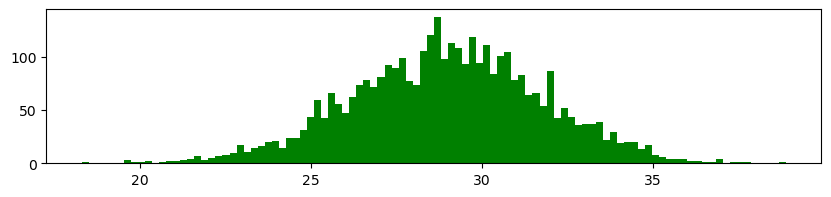

In [11]:
plt.figure(figsize = (10,2), dpi = 100)
plt.hist(aug_data, bins=100,color='g')
plt.show()

In [12]:


import csv

f = open("./00.data/seoul.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
aug_data = []

next(data)
for row in data:
    try:
        dates = row[0].split("-")
        
        if dates[1] == '08':
            aug_data.append(float(row[4]))
        else:    
            pass
    except Exception:
        pass
    
print(aug_data)
f.close()


[29.6, 30.7, 32.0, 31.5, 32.4, 33.6, 30.9, 29.5, 26.7, 26.8, 30.5, 30.5, 29.0, 28.9, 30.4, 31.7, 32.0, 33.3, 32.5, 33.5, 31.1, 26.7, 26.1, 27.5, 23.9, 21.3, 23.3, 26.0, 27.7, 27.9, 27.2, 32.3, 27.5, 31.7, 33.2, 34.5, 31.7, 30.2, 35.6, 34.8, 33.0, 30.8, 27.8, 24.8, 23.9, 23.8, 25.3, 27.3, 28.3, 30.3, 30.3, 30.0, 30.0, 27.7, 30.9, 25.3, 26.8, 29.1, 30.5, 30.6, 29.5, 26.5, 32.0, 31.6, 31.4, 31.2, 32.0, 29.9, 29.0, 30.3, 30.6, 30.6, 31.5, 31.0, 30.6, 29.5, 27.4, 28.1, 27.4, 28.4, 25.2, 29.5, 26.5, 29.0, 28.9, 29.0, 31.5, 31.2, 26.0, 23.9, 27.8, 29.0, 25.4, 31.0, 29.0, 30.5, 29.5, 28.8, 27.5, 31.4, 32.0, 33.0, 33.8, 32.9, 34.5, 33.8, 31.7, 32.5, 32.4, 33.5, 32.4, 28.0, 32.2, 30.1, 30.5, 30.1, 22.8, 24.0, 28.4, 28.5, 29.5, 31.1, 31.5, 31.0, 31.5, 32.0, 32.2, 32.7, 34.0, 31.0, 30.9, 31.0, 32.2, 33.2, 33.0, 31.3, 30.6, 31.5, 30.3, 24.9, 24.9, 21.5, 20.3, 23.4, 27.2, 26.9, 29.0, 29.5, 28.5, 27.5, 28.5, 28.2, 29.2, 29.3, 29.4, 31.7, 31.5, 28.9, 29.3, 29.0, 29.8, 31.5, 31.7, 30.1, 28.9, 27.8, 25.

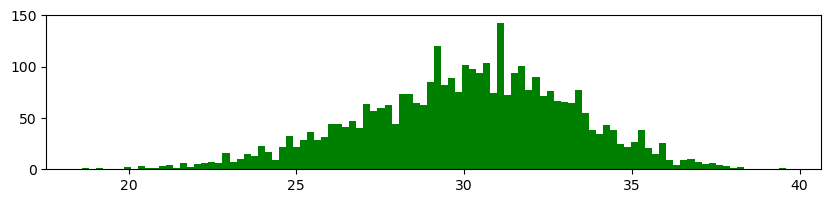

In [13]:
plt.figure(figsize = (10,2), dpi = 100)
plt.hist(aug_data, bins=100,color='g')
plt.show()

In [14]:


import csv

f = open("./00.data/seoul.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
aug_data = []
jan_data = []

next(data)
for row in data:
    try:
        dates = row[0].split("-")
        if dates[1] == '08':
            aug_data.append(float(row[4]))
        elif dates[1] == '01':
            jan_data.append(float(row[4]))
        else:    
            pass
    except Exception:
        pass
    
print(aug_data)
print(jan_data)
f.close()


[29.6, 30.7, 32.0, 31.5, 32.4, 33.6, 30.9, 29.5, 26.7, 26.8, 30.5, 30.5, 29.0, 28.9, 30.4, 31.7, 32.0, 33.3, 32.5, 33.5, 31.1, 26.7, 26.1, 27.5, 23.9, 21.3, 23.3, 26.0, 27.7, 27.9, 27.2, 32.3, 27.5, 31.7, 33.2, 34.5, 31.7, 30.2, 35.6, 34.8, 33.0, 30.8, 27.8, 24.8, 23.9, 23.8, 25.3, 27.3, 28.3, 30.3, 30.3, 30.0, 30.0, 27.7, 30.9, 25.3, 26.8, 29.1, 30.5, 30.6, 29.5, 26.5, 32.0, 31.6, 31.4, 31.2, 32.0, 29.9, 29.0, 30.3, 30.6, 30.6, 31.5, 31.0, 30.6, 29.5, 27.4, 28.1, 27.4, 28.4, 25.2, 29.5, 26.5, 29.0, 28.9, 29.0, 31.5, 31.2, 26.0, 23.9, 27.8, 29.0, 25.4, 31.0, 29.0, 30.5, 29.5, 28.8, 27.5, 31.4, 32.0, 33.0, 33.8, 32.9, 34.5, 33.8, 31.7, 32.5, 32.4, 33.5, 32.4, 28.0, 32.2, 30.1, 30.5, 30.1, 22.8, 24.0, 28.4, 28.5, 29.5, 31.1, 31.5, 31.0, 31.5, 32.0, 32.2, 32.7, 34.0, 31.0, 30.9, 31.0, 32.2, 33.2, 33.0, 31.3, 30.6, 31.5, 30.3, 24.9, 24.9, 21.5, 20.3, 23.4, 27.2, 26.9, 29.0, 29.5, 28.5, 27.5, 28.5, 28.2, 29.2, 29.3, 29.4, 31.7, 31.5, 28.9, 29.3, 29.0, 29.8, 31.5, 31.7, 30.1, 28.9, 27.8, 25.

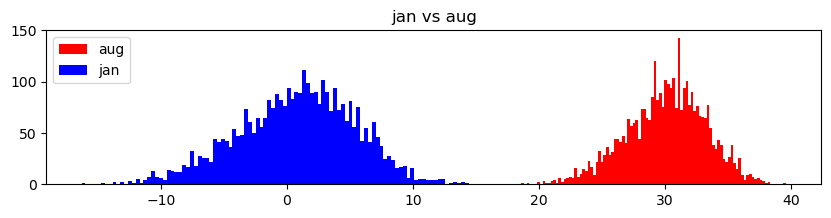

In [15]:
plt.figure(figsize = (10,2), dpi = 100)
plt.title('jan vs aug')
plt.hist(aug_data, bins=100,color='r',label='aug')
plt.hist(jan_data, bins=100,color='b',label='jan')
plt.legend(loc=2)
plt.show()

### .boxplot(): 상자그림 Boxplot
최댓값, 최솟값, 상위%, 2/4(중앙값), %에 위치한 값을 보여줌

In [ ]:
import matplotlib.pyplot as plt
import random

result = []

for i in range(13):
    result.append(random.randint(1,1000))
    
print(sorted(result))

plt.boxplot(result)
plt.show()

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
f.close()

In [ ]:
# 나의 결측치 처리 방법 -> try - except로 치워버리기

import csv

f = open("./00.data/seoul.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
aug_data = []
jan_data = []

header = next(data)
for row in data:
    try:
        dates = row[0].split("-")
        if dates[1] == '08':
            aug_data.append(float(row[4]))
        elif dates[1] == '01':
            jan_data.append(float(row[4]))
        else:    
            pass
    except Exception:
        pass
    
print(aug_data)
print(jan_data)
f.close()


In [ ]:
plt.boxplot([jan_data,aug_data])

#### 이중 리스트 데이터 시각화하기

##### 교수님과 함께

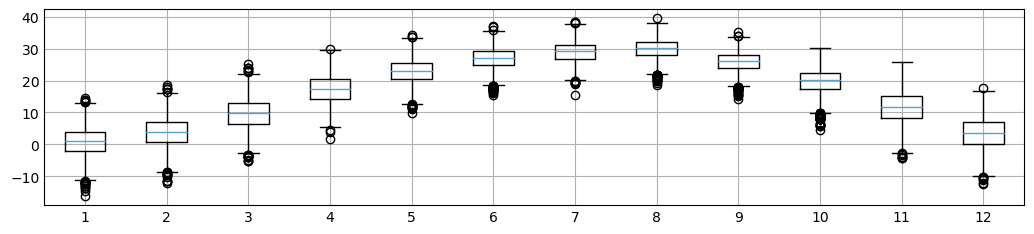

In [180]:

import csv

f = open("./00.data/seoul.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
months_data = [[],[],[],[],[],[],[],[],[],[],[],[]]

next(data)
for row in data:
    try:
        dates = row[0].split("-")
        month = int(dates[1])  #숫자가 됨
        months_data[month-1].append(float(row[4]))        #month를 인덱스에 쓸 수 있게 됨
    except Exception:
        pass    
    
f.close()

plt.figure(figsize=(10,2),dpi=100)
plt.boxplot(months_data)
plt.show()

##### 나의 얼레벌레

In [26]:
#나의 얼레벌레

import csv

f = open("./00.data/seoul.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
months_data = [[],[],[],[],[],[],[],[],[],[],[],[]]
months=[]
next(data)
for row in data:
    try:
        dates = row[0].split("-")
        for i in range(0,12):
            if i < 10:
                month = '0'+str(i+1)
            else:
                month = str(i+1)
            months.append(month)    
        # f.seek(0) 
        if months[i] == dates[1]:
            months_data[i].append(float(row[4])) 
                   
    except Exception:
        pass    
    
f.close()



KeyboardInterrupt: 

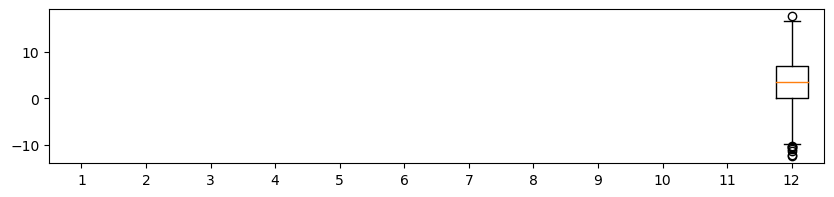

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,2),dpi=100)
plt.boxplot(months_data)
plt.show()

#### raise by 소정

f.seek(0) -> 커서의 위치를 0번째 row로 옮긴다

## 경주

In [ ]:
import csv

f = open("./00.data/gyeongju.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
aug_data = []

next(data)
for row in data:
    try:
        dates = row[0].split("-")
        
        if dates[1] == '08':
            aug_data.append(float(row[4]))
        else:    
            pass
    except Exception:
        pass
    
print(aug_data)
f.close()


In [ ]:
plt.figure(figsize = (10,2), dpi = 100)
plt.hist(aug_data, bins=100,color='g')
plt.show()

In [ ]:
import csv

f = open("./00.data/gyeongju.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
birth_data = []

next(data)
for row in data:
    try:
        dates = row[0].split("-")
        
        if dates[1] == '02' and dates[2] == '17':
            birth_data.append(float(row[4]))
        else:    
            pass
    except Exception:
        pass
    
print(birth_data)
f.close()


In [ ]:
plt.figure(figsize = (10,2), dpi = 100)
plt.hist(birth_data, bins=100,color='skyblue')
plt.show()

In [ ]:

import csv

f = open("./00.data/gyeongju.csv","r",encoding='cp949')
data = csv.reader(f,delimiter=',')
aug_data = []
jan_data = []

next(data)
for row in data:
    try:
        dates = row[0].split("-")
        if dates[1] == '08':
            aug_data.append(float(row[4]))
        elif dates[1] == '01':
            jan_data.append(float(row[4]))
        else:    
            pass
    except Exception:
        pass
    
print(aug_data)
print(jan_data)
f.close()


In [ ]:
plt.figure(figsize = (10,2), dpi = 100)
plt.title('jan vs aug')
plt.hist(aug_data, bins=100,color='r',label='aug')
plt.hist(jan_data, bins=100,color='b',label='jan')
plt.legend(loc=2)
plt.show()